In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def generate(num):
    index = 0
    freq = np.zeros((4,1))
    x1 = np.random.uniform(-1,1,num)
    x2 = np.random.uniform(-1,1,num)
    y = np.zeros((num,1))
    X = np.zeros((num,2))
    for i in range(num):
        if (abs(x1[i])+abs(x2[i])<0.7) and (abs(x1[i])+abs(x2[i])>0.4):
            y[index]=0
            freq[0]+=1
            X[index,0]=x1[i]
            X[index,1]=x2[i]
        elif (math.sqrt(x1[i]**2+x2[i]**2))<0.3:
            y[index]=1
            freq[1]+=1
            X[index,0]=x1[i]
            X[index,1]=x2[i]
        elif math.sin(10*x2[i])<0:
            y[index]=2
            freq[2]+=1
            X[index,0]=x1[i]
            X[index,1]=x2[i]         
        elif math.sin(5*x1[i])>0:
            y[index]=3
            freq[3]+=1
            X[index,0]=x1[i]
            X[index,1]=x2[i]
        index+=1  

    y=y[:index]
    X=X[:index,:]
            
    return X,y,freq
        

In [4]:
X_train,y_train,freq = generate(500)
print("frequency of each class in the training data:\n\n",freq/len(y_train))
X_valid,y_valid,freq=generate(500)
#print(freq/len(y_valid))
X_test,y_test,freq=generate(1000)
#print(freq/len(y_test))

frequency of each class in the training data:

 [[0.158]
 [0.074]
 [0.38 ]
 [0.2  ]]


encode y label

In [5]:
def one_hot_label(y):
    n = len(y)
    one_hot_y = np.zeros((n,4))
    for i in range(n):
        one_hot_y[i, int(y[i])] = 1
    return one_hot_y

activation functions

In [6]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.square(x)

def softmax(A):  
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


neural network

In [7]:
class NeuralNetwork:
    def __init__(self, x, y,size):
        self.input      = x
        self.weights1   =  np.random.rand(self.input.shape[1],size)
        self.weights2   =  np.random.rand(size,4) 
        self.b1   = np.zeros((1,size)) 
        self.b2   = np.zeros((1,4))
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.n          = len(x)

    def feedforward(self):
        self.layer1 = tanh(np.dot(self.input, self.weights1)+self.b1)
        self.output = softmax(np.dot(self.layer1, self.weights2)+self.b2) # n*4

    def backprop(self,lr,reg):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        delta3 = self.output-self.y
        delta2 = tanh_derivative(self.layer1)*np.dot(delta3, self.weights2.T)
        d_weights2 = np.dot(self.layer1.T, delta3)+reg*self.weights2
        d_b2 = np.sum(delta3, axis=0, keepdims=True)
        d_weights1 = np.dot(self.input.T, delta2)+reg*self.weights1
        d_b1 = np.sum(delta2, axis=0)

        # update the weights with the derivative (slope) of the loss function
        self.weights1 -= lr * d_weights1
        self.b1 -= lr * d_b1
        self.weights2 -= lr * d_weights2
        self.b2 -= lr * d_b2
    
    def train(self,iteration,lr,reg):
        for i in range(iteration):
            nn.feedforward()
            nn.backprop(lr,reg)
    
    def predict(self,x):
        layer1 = tanh(np.dot(x, self.weights1)+self.b1)
        output = softmax(np.dot(layer1, self.weights2)+self.b2)
        predict = np.argmax(output, axis=1)
        return predict
    
    def accuracy(self,predict,y):
        count = 0
        for i in range(len(y)):
            if predict[i]==y[i]:
                count+=1
        return count/len(y)

one hot encode label

In [8]:
y_train=one_hot_label(y_train)

train and chose parameters

choose size of hidden layer

In [17]:
size = [10,20,50,100,200]
for i in range(5):
    nn = NeuralNetwork(X_train,y_train,size=size[i])
    nn.train(iteration=10000,lr=1e-3,reg=0.1)
    predict = nn.predict(X_valid)
    acc = nn.accuracy(predict,y_valid)
    print('size:',size[i],'accuracy:',acc)

size: 10 accuracy: 0.816
size: 20 accuracy: 0.882
size: 50 accuracy: 0.916
size: 100 accuracy: 0.918
size: 200 accuracy: 0.912


choose learning rate:

In [18]:
lr = [5e-5,1e-4,5e-4,1e-3,5e-3]
for i in range(5):
    nn = NeuralNetwork(X_train,y_train,size=100)
    nn.train(iteration=10000,lr=lr[i],reg=0.1)
    predict = nn.predict(X_valid)
    acc = nn.accuracy(predict,y_valid)
    print('learning rate:',lr[i],'accuracy:',acc)

learning rate: 5e-05 accuracy: 0.758
learning rate: 0.0001 accuracy: 0.772
learning rate: 0.0005 accuracy: 0.878
learning rate: 0.001 accuracy: 0.9
learning rate: 0.005 accuracy: 0.864


choose learning rate:

In [21]:
reg = [1e-3,5e-3,1e-2,5e-2,1e-1]
for i in range(5):
    nn = NeuralNetwork(X_train,y_train,size=100)
    nn.train(iteration=10000,lr=1e-3,reg=reg[i])
    predict = nn.predict(X_valid)
    acc = nn.accuracy(predict,y_valid)
    print('regularization para:',reg[i],'accuracy:',acc)

regularization para: 0.001 accuracy: 0.932
regularization para: 0.005 accuracy: 0.92
regularization para: 0.01 accuracy: 0.938
regularization para: 0.05 accuracy: 0.934
regularization para: 0.1 accuracy: 0.908


choose the model with size of hidden layer = 100, learning rate = 0.001 and regularization parameter = 0.01

In [23]:
nn = NeuralNetwork(X_train,y_train,size=100)
nn.train(iteration=10000,lr=1e-3,reg=0.01)
predict = nn.predict(X_valid)
acc = nn.accuracy(predict,y_valid)
print('accuracy:',acc)

accuracy: 0.932


Because the initial value of weights would be random, the accuracy of the neural network maybe little different every time run it.

test data

In [27]:
predict = nn.predict(X_test)
acc = nn.accuracy(predict,y_test)
print('accuracy on test data:\n\n',acc)

accuracy on test data:

 0.923


labels plot

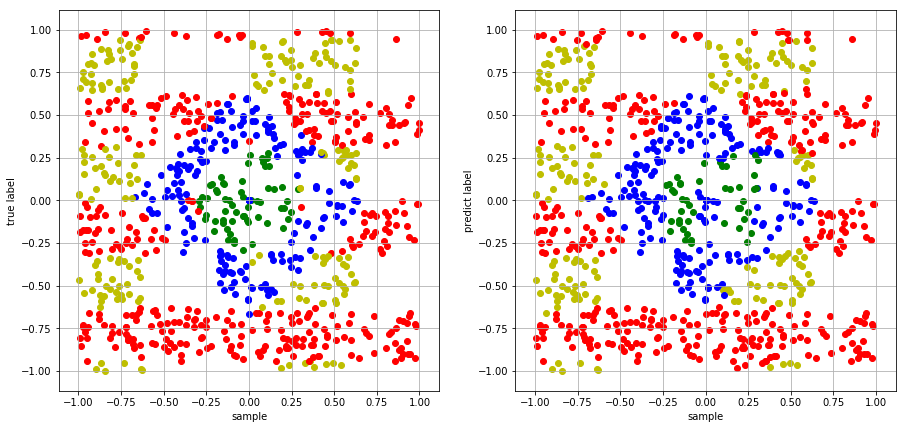

In [33]:
import matplotlib.pyplot as plt
n = len(y_test)
fig, axs = plt.subplots(1,2,figsize=(15, 7))
for i in range(n):
    if y_test[i]==0:
        color = 'b'
    elif y_test[i]==1:
        color = 'g'
    elif y_test[i]==2:
        color = 'r'
    else:
        color = 'y'
    axs[0].scatter(X_test[i,0],X_test[i,1], c=color)
axs[0].set_xlabel('sample')
axs[0].set_ylabel('true label')
axs[0].grid()
#choose 100 points to plot
for i in range(n):
    if predict[i]==0:
        color = 'b'
    elif predict[i]==1:
        color = 'g'
    elif predict[i]==2:
        color = 'r'
    else:
        color = 'y'
    axs[1].scatter(X_test[i,0],X_test[i,1], c=color)
axs[1].set_xlabel('sample')
axs[1].set_ylabel('predict label')
axs[1].grid()
plt.show()

                                    where blue: label 0, green: label 1, red: label 2, yellow: label 3 


Conclusion:

These two pictures are quite similar. It is clear that the neural network classifier is non-linear. The green points (label 1) are with the lowest frequency, it is more likely to classify something wrong related to green points (label 1). 